In [49]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
url = "https://www.fruityvice.com/api/fruit/all"
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    df = pd.json_normalize(data)
else:
    print("Request failed:", response.status_code)

In [51]:
df.head()

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.0,18.0,18.0,0.0
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.4,5.4,5.5,0.8
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.2,17.2,22.0,1.0
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.2,2.6,3.9,0.9
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.1,10.0,15.0,0.4


In [52]:
df.tail()

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
44,Pumpkin,100,Cucurbitaceae,Cucurbitales,Cucurbita,25,0.30,3.3,4.6,1.1
45,Japanese Persimmon,101,Ebenaceae,Ericales,Diospyros,70,0.20,13.0,19.0,0.6
46,Papaya,42,Caricaceae,Brassicales,Carica,39,0.30,4.4,5.8,0.5
47,Annona,103,Annonaceae,Rosales,Annonas,92,0.29,3.4,19.1,1.5
48,Ceylon Gooseberry,104,Salicaceae,Malpighiales,Dovyalis,47,0.30,8.1,9.6,1.2


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      49 non-null     object 
 1   id                        49 non-null     int64  
 2   family                    49 non-null     object 
 3   order                     49 non-null     object 
 4   genus                     49 non-null     object 
 5   nutritions.calories       49 non-null     int64  
 6   nutritions.fat            49 non-null     float64
 7   nutritions.sugar          49 non-null     float64
 8   nutritions.carbohydrates  49 non-null     float64
 9   nutritions.protein        49 non-null     float64
dtypes: float64(4), int64(2), object(4)
memory usage: 4.0+ KB


In [54]:
df.describe()

,id,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,58.816327,68.510204,2.005102,7.990408,12.152857,1.368163
std,32.734840,86.454256,8.872052,4.907164,5.661771,2.367021
min,1.000000,15.000000,0.000000,0.000000,3.100000,0.000000
25%,33.000000,39.000000,0.200000,4.300000,8.300000,0.540000
50%,68.000000,50.000000,0.300000,8.000000,11.300000,0.900000
75%,84.000000,70.000000,0.500000,10.000000,17.000000,1.200000
max,104.000000,628.000000,61.000000,19.100000,27.100000,15.000000


Which fruits have the most sugar and carbohydrates?

In [ ]:
sugar = df.drop(
    columns=[
        "order",
        "genus",
        "nutritions.protein",
        "nutritions.fat",
        "nutritions.calories",
        "nutritions.carbohydrates",
    ]
)
sugar.head()

,name,id,family,nutritions.sugar
0,Persimmon,52,Ebenaceae,18.0
1,Strawberry,3,Rosaceae,5.4
2,Banana,1,Musaceae,17.2
3,Tomato,5,Solanaceae,2.6
4,Pear,4,Rosaceae,10.0


In [69]:
grouped_sugar = sugar.groupby(["family"])["nutritions.sugar"].sum().reset_index()
grouped_sugar.head()

,family,nutritions.sugar
0,Ebenaceae,13.0
1,Actinidiaceae,17.9
2,Anacardiaceae,13.7
3,Annonaceae,3.4
4,Betulaceae,4.3


In [ ]:
ranked_sugar = grouped_sugar.sort_values(by="nutritions.sugar", ascending=False)
ranked_sugar.head()

,family,nutritions.sugar
20,Rosaceae,75.92
16,Moraceae,43.20
21,Rutaceae,30.00
10,Ebenaceae,18.00
1,Actinidiaceae,17.90


In [66]:
top20_sugar = ranked_sugar.head(20)
top20_sugar

,family,nutritions.sugar
20,Rosaceae,75.92
16,Moraceae,43.20
21,Rutaceae,30.00
10,Ebenaceae,18.00
1,Actinidiaceae,17.90
9,Cucurbitaceae,17.80
17,Musaceae,17.20
8,Clusiaceae,16.11
25,Vitaceae,16.00
23,Sapindaceae,15.00


<Axes: >

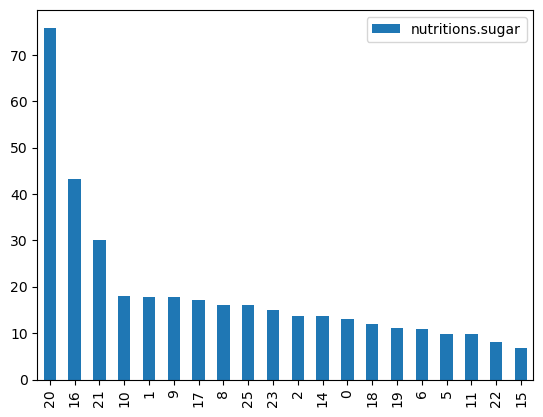

In [ ]:
top20_sugar.plot(kind="bar")